This document contains some QM group presentaion parts shown in below:
1. multiple linear regression - based on the traffic accident data

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

In [83]:
# load the data
csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")

C:\Users\29425\AppData\Local\Temp\ipykernel_15384\2112012909.py:2: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")


In [84]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 36 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   accident_year                                int64  
 2   accident_reference                           object 
 3   location_easting_osgr                        float64
 4   location_northing_osgr                       float64
 5   longitude                                    float64
 6   latitude                                     float64
 7   police_force                                 int64  
 8   accident_severity                            int64  
 9   number_of_vehicles                           int64  
 10  number_of_casualties                         int64  
 11  date                                         object 
 12  day_of_week                                  int64  
 13  time        

In [85]:
csv.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [86]:
# build a model to predict the traffic accident
# base on the 1. road surface condition 2. weather condition 3. light condition 

sub_csv = csv[["light_conditions", "weather_conditions", "road_surface_conditions"]]
sub_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 3 columns):
 #   Column                   Dtype
---  ------                   -----
 0   light_conditions         int64
 1   weather_conditions       int64
 2   road_surface_conditions  int64
dtypes: int64(3)
memory usage: 199.2 MB


In [87]:
# drop the invalid data in -1
sub_csv = sub_csv.loc[(sub_csv["light_conditions"] != -1) & 
                      (sub_csv["weather_conditions"] != -1) & 
                      (sub_csv["weather_conditions"] != 8)& 
                      (sub_csv["weather_conditions"] != 9)& 
                      (sub_csv["road_surface_conditions"] != -1), ["light_conditions", "weather_conditions", "road_surface_conditions"]]

In [88]:
# calculate the cases number of each type
accident_count = sub_csv.groupby(["light_conditions", "weather_conditions", "road_surface_conditions"]).size().reset_index(name='accident_counts')
accident_count.head(100)
# accident_count.info()

,light_conditions,weather_conditions,road_surface_conditions,accident_counts
0,1,1,1,4208383
1,1,1,2,715140
2,1,1,3,7058
3,1,1,4,64565
4,1,1,5,1055
...,...,...,...,...
95,4,6,5,8
96,4,6,6,1
97,4,6,9,2
98,4,7,1,1979


In [89]:
# reform the df to do dummy
accident_count[["light_conditions", "weather_conditions", "road_surface_conditions"]] = accident_count[["light_conditions", "weather_conditions", "road_surface_conditions"]].astype(object)

# get dummy
accident_numeric = pd.get_dummies(accident_count)

accident_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   accident_counts            241 non-null    int64
 1   light_conditions_1         241 non-null    uint8
 2   light_conditions_4         241 non-null    uint8
 3   light_conditions_5         241 non-null    uint8
 4   light_conditions_6         241 non-null    uint8
 5   light_conditions_7         241 non-null    uint8
 6   weather_conditions_1       241 non-null    uint8
 7   weather_conditions_2       241 non-null    uint8
 8   weather_conditions_3       241 non-null    uint8
 9   weather_conditions_4       241 non-null    uint8
 10  weather_conditions_5       241 non-null    uint8
 11  weather_conditions_6       241 non-null    uint8
 12  weather_conditions_7       241 non-null    uint8
 13  road_surface_conditions_1  241 non-null    uint8
 14  road_surface_conditions_2 

d:\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Text(0.5, 1.0, 'Correlation Matrix')

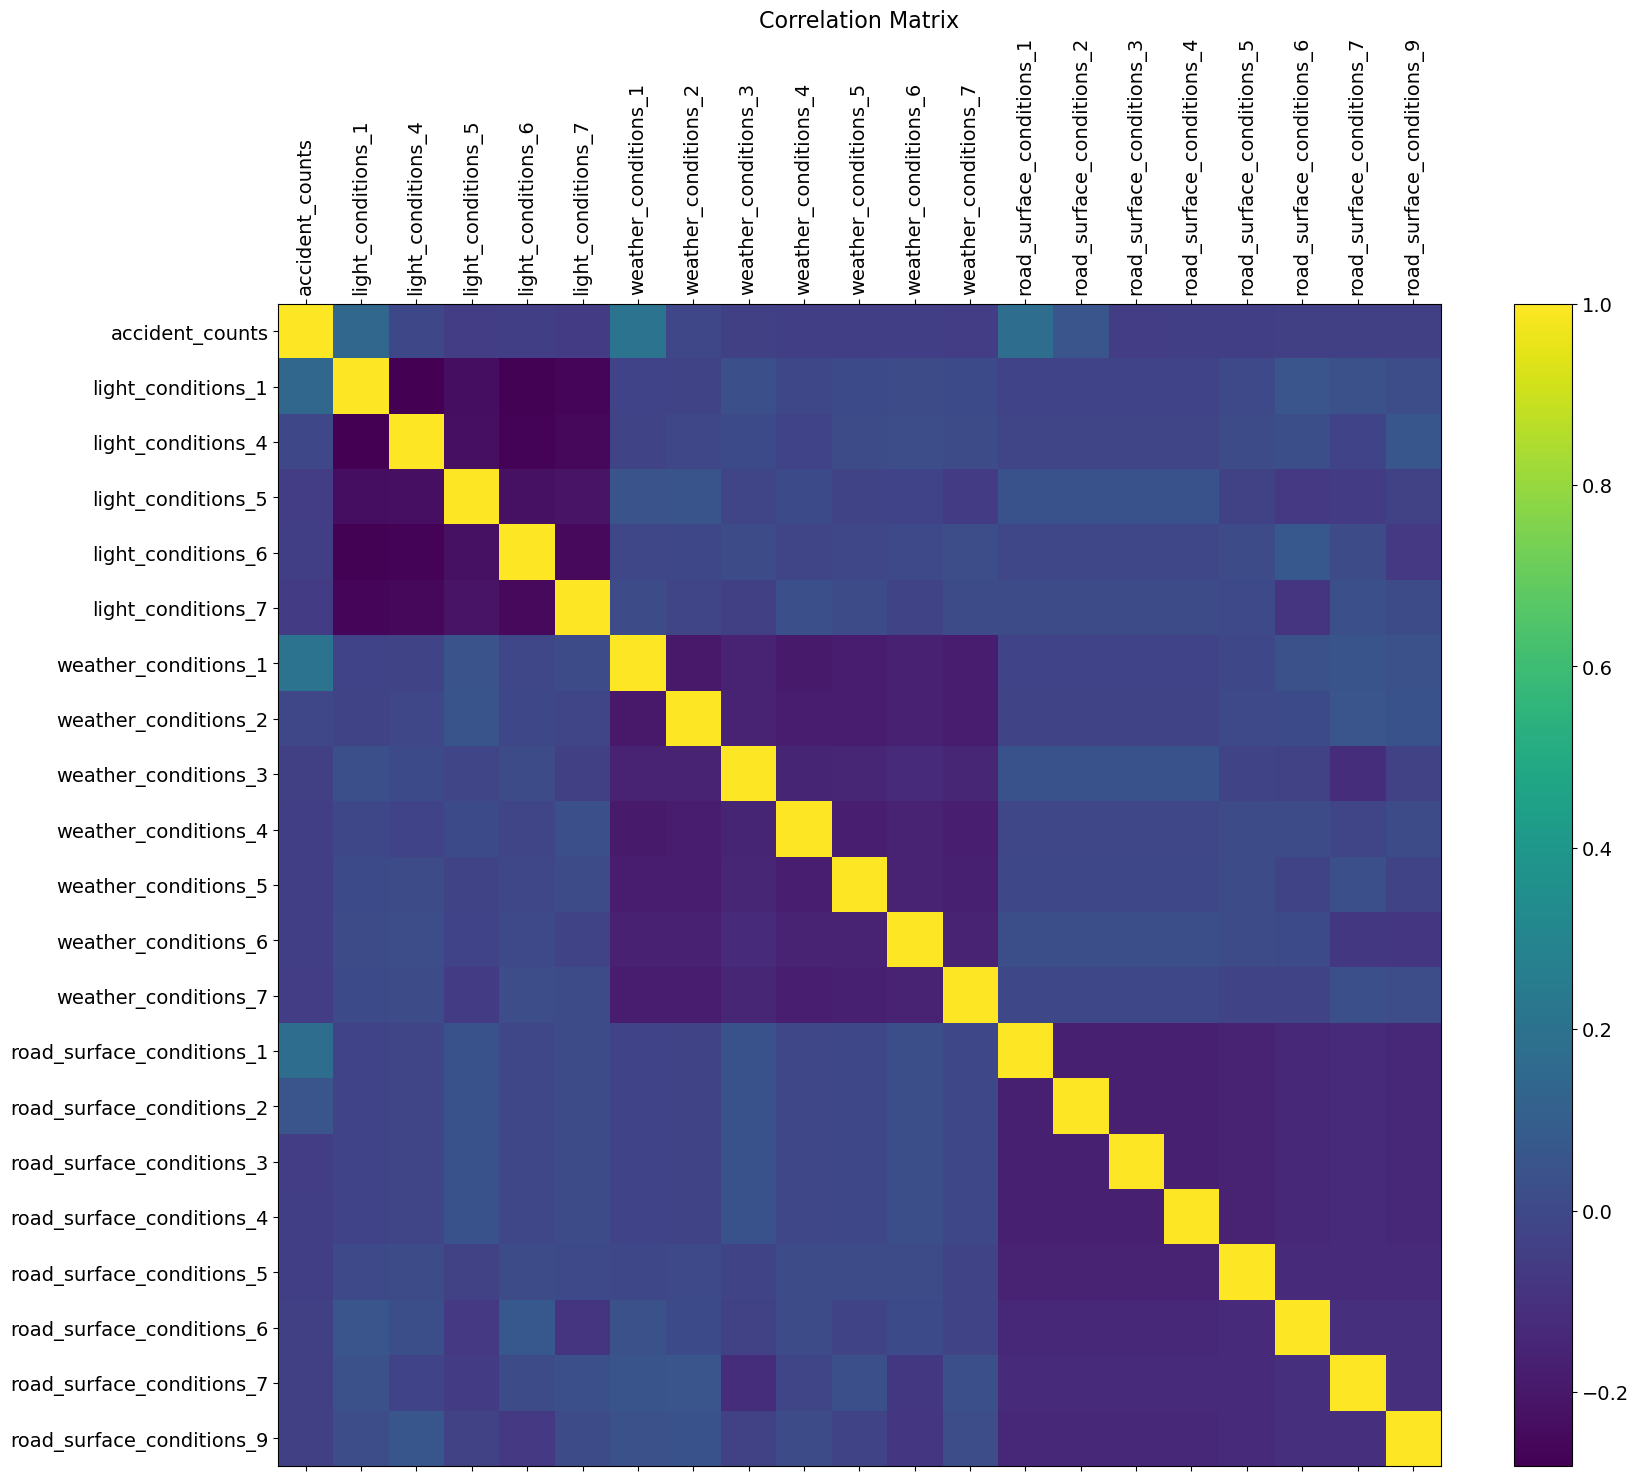

In [90]:
# draw the correalation matrix
df = accident_numeric
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)